# Analisi della distribuzione della popolazione residente in Italia

Usiamo i dati dell'ISTAT per costruire la distribuzione dell'età della popolazione italiana.

I dati vanno scaricati dalla [pagina dell'ISTAT](http://dati.istat.it/Index.aspx?DataSetCode=DCIS_POPRES1) con l'opzione "Esporta > Formato di testo (CSV)".

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/DCIS_POPRES1_19032025135457129.csv')

In [3]:
df

,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,1,nubile/celibe,2024,2024,195688,NaN,NaN
1,IT,Italia,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,99,totale,2024,2024,195688,NaN,NaN
2,IT,Italia,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,1,nubile/celibe,2024,2024,184942,NaN,NaN
3,IT,Italia,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,99,totale,2024,2024,184942,NaN,NaN
4,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y0,0 anni,1,nubile/celibe,2024,2024,380630,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289165,ITG28,Oristano,JAN,popolazione al 1º gennaio,9,totale,Y_GE100,100 anni e più,16,già in unione civile (per decesso del partner),2024,2024,0,NaN,NaN
289166,ITG28,Oristano,JAN,popolazione al 1º gennaio,9,totale,Y_GE100,100 anni e più,17,già in unione civile (per scioglimento unione),2024,2024,0,NaN,NaN
289167,ITG28,Oristano,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,15,unito/a civilmente,2024,2024,31,NaN,NaN
289168,ITG28,Oristano,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,16,già in unione civile (per decesso del partner),2024,2024,0,NaN,NaN


Notare che la codifica dell'età è fatta con una stringa. Questo tipo di codifica è abbastanza comune nei dati che si trovano in rete. La stringa va innanzitutto convertita in un valore numerico che può essere utilizzato.

In [4]:
df.ETA1.unique()

array(['Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10',
       'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18', 'Y19',
       'Y20', 'Y21', 'Y22', 'Y23', 'Y24', 'Y25', 'Y26', 'Y27', 'Y28',
       'Y29', 'Y30', 'Y31', 'Y32', 'Y33', 'Y34', 'Y35', 'Y36', 'Y37',
       'Y38', 'Y39', 'Y40', 'Y41', 'Y42', 'Y43', 'Y44', 'Y45', 'Y46',
       'Y47', 'Y48', 'Y49', 'Y50', 'Y51', 'Y52', 'Y53', 'Y54', 'Y55',
       'Y56', 'Y57', 'Y58', 'Y59', 'Y60', 'Y61', 'Y62', 'Y63', 'Y64',
       'Y65', 'Y66', 'Y67', 'Y68', 'Y69', 'Y70', 'Y71', 'Y72', 'Y73',
       'Y74', 'Y75', 'Y76', 'Y77', 'Y78', 'Y79', 'Y80', 'Y81', 'Y82',
       'Y83', 'Y84', 'Y85', 'Y86', 'Y87', 'Y88', 'Y89', 'Y90', 'Y91',
       'Y92', 'Y93', 'Y94', 'Y95', 'Y96', 'Y97', 'Y98', 'Y99', 'Y_GE100',
       'TOTAL'], dtype=object)

I dati sono organizzati per aree territoriali. Quindi è possibile avere distribuzioni per aree geografiche.

In [5]:
sorted(df.Territorio.unique())

['Abruzzo',
 'Agrigento',
 'Alessandria',
 'Ancona',
 'Arezzo',
 'Ascoli Piceno',
 'Asti',
 'Avellino',
 'Bari',
 'Barletta-Andria-Trani',
 'Basilicata',
 'Belluno',
 'Benevento',
 'Bergamo',
 'Biella',
 'Bologna',
 'Bolzano / Bozen',
 'Brescia',
 'Brindisi',
 'Cagliari',
 'Calabria',
 'Caltanissetta',
 'Campania',
 'Campobasso',
 'Caserta',
 'Catania',
 'Catanzaro',
 'Centro',
 'Chieti',
 'Como',
 'Cosenza',
 'Cremona',
 'Crotone',
 'Cuneo',
 'Emilia-Romagna',
 'Enna',
 'Fermo',
 'Ferrara',
 'Firenze',
 'Foggia',
 'Forlì-Cesena',
 'Friuli-Venezia Giulia',
 'Frosinone',
 'Genova',
 'Gorizia',
 'Grosseto',
 'Imperia',
 'Isernia',
 'Isole',
 'Italia',
 "L'Aquila",
 'La Spezia',
 'Latina',
 'Lazio',
 'Lecce',
 'Lecco',
 'Liguria',
 'Livorno',
 'Lodi',
 'Lombardia',
 'Lucca',
 'Macerata',
 'Mantova',
 'Marche',
 'Massa-Carrara',
 'Matera',
 'Messina',
 'Milano',
 'Modena',
 'Molise',
 'Monza e della Brianza',
 'Napoli',
 'Nord-est',
 'Nord-ovest',
 'Novara',
 'Nuoro',
 'Oristano',
 'Padova

In [6]:
sorted(df['Stato civile'].unique())

['coniugata/o',
 'divorziata/o',
 'già in unione civile (per decesso del partner) ',
 'già in unione civile (per scioglimento unione)',
 'nubile/celibe',
 'totale',
 'unito/a civilmente ',
 'vedova/o']

In [7]:
df['anni'] = pd.to_numeric(df.ETA1.str.replace('Y','').str.replace('_GE', ''), errors='coerce')

In [8]:
df_it = df[(df.Territorio=='Italia') & (df.Sesso=='totale') & (df['Stato civile']=='totale') & (~ df.anni.isnull())].reset_index()
df_it = df_it.sort_values(by=['anni'])

In [9]:
df_it

,index,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags,anni
0,5,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y0,0 anni,99,totale,2024,2024,380630,NaN,NaN,0.0
1,1121,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y1,1 anni,99,totale,2024,2024,397193,NaN,NaN,1.0
2,2171,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y2,2 anni,99,totale,2024,2024,407572,NaN,NaN,2.0
3,2451,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y3,3 anni,99,totale,2024,2024,414581,NaN,NaN,3.0
4,3457,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y4,4 anni,99,totale,2024,2024,431500,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,174265,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y96,96 anni,99,totale,2024,2024,42037,NaN,NaN,96.0
97,175688,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y97,97 anni,99,totale,2024,2024,29371,NaN,NaN,97.0
98,177698,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y98,98 anni,99,totale,2024,2024,20214,NaN,NaN,98.0
99,180003,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y99,99 anni,99,totale,2024,2024,13839,NaN,NaN,99.0


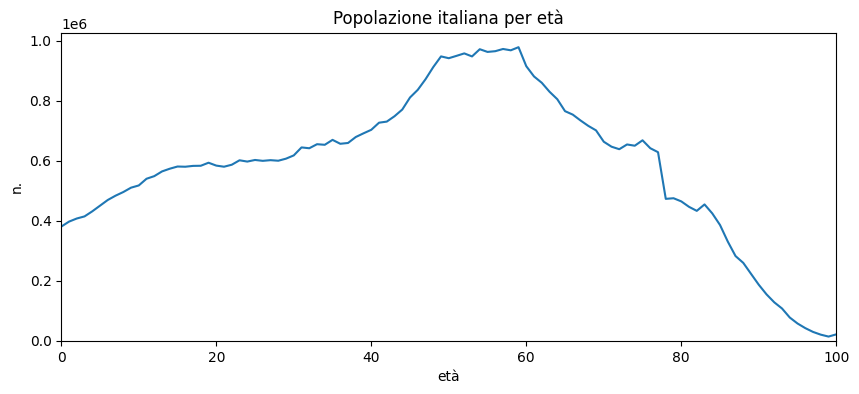

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(df_it.anni, df_it.Value, linestyle='-')
plt.title('Popolazione italiana per età')
plt.xlabel('età')
plt.ylabel('n.')
plt.ylim(0)
plt.xlim(0, 100)
plt.show()

In [13]:
df_it['Value_cum'] = df_it.Value.cumsum()
df_it['Value_perc'] = df_it.Value_cum/df_it.Value_cum.max()

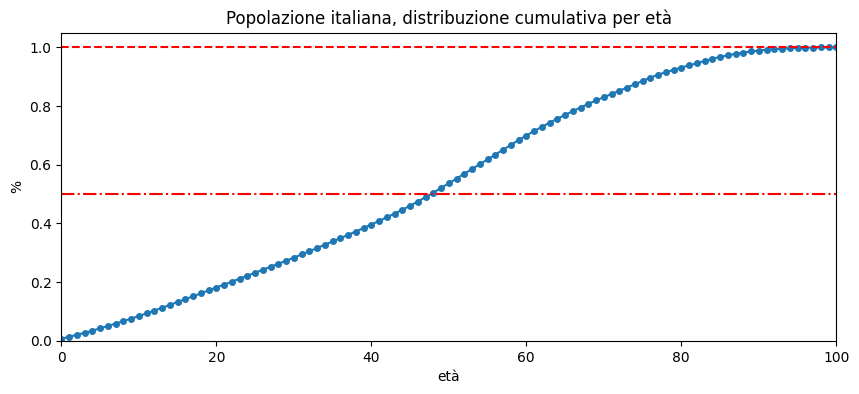

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(df_it.anni, df_it.Value_perc, 'o', linestyle='-', markersize=4)
plt.plot((0, 100), (1,1), color='red', linestyle='--')
plt.plot((0, 100), (.5,.5), color='red', linestyle='-.')
plt.title('Popolazione italiana, distribuzione cumulativa per età')
plt.xlabel('età')
plt.ylabel('%')
plt.ylim(0)
plt.xlim(0, 100)
plt.show()

Per trasformare la distribuzione discreta in continua, usiamo la funzione [```interp1d```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).

Possiamo facilmente invertire la distribuzione cumulativa usando il campo ```Value_perc``` come asse $x$.

In [16]:
from scipy.interpolate import interp1d
interp_val = interp1d(df_it.anni, df_it.Value)
interp_cum_inv = interp1d(df_it.Value_perc, df_it.anni)

La mediana è semplicemente il 50° percentile della cumulativa:

In [17]:
median = interp_cum_inv(0.5)
print('median: {:.2f}y'.format(median))

median: 47.71y


La media si può calcolare come media pesata usando come pesi il numero di persone con una certa età.

In [19]:
avg = np.average(df_it.anni, weights=df_it.Value)
print('average: : {:.2f}y'.format(avg))

average: : 46.11y


La moda è semplicemente il valore a cui corrisponde il maggior numero di persone. Può essere calcolato solo come valore intero, visto il formato dei dati. 

In [20]:
mode = float(df_it.loc[df_it.Value.idxmax()]['anni'])
print('mode: {:.0f}y'.format(mode))

mode: 59y


In [21]:
print('average: {:.2f}y, median: {:.2f}y, mode: {:.2f}y'.format(avg, median, mode))

average: 46.11y, median: 47.71y, mode: 59.00y


Possiamo riportare gli indicatodi sulla distribuzione

percentile: 5.00% 5.99y
percentile: 10.00% 11.73y
percentile: 25.00% 26.80y
percentile: 75.00% 63.52y
percentile: 90.00% 76.35y
percentile: 95.00% 82.55y


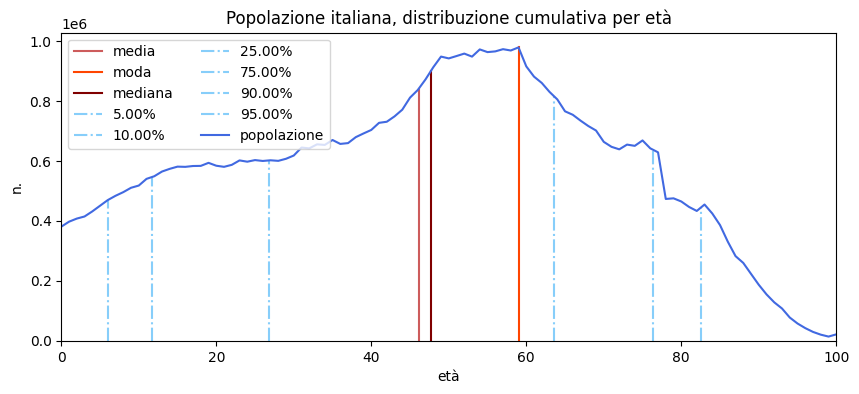

In [22]:
plt.figure(figsize=(10, 4))
plt.plot((avg, avg), (0, interp_val(avg)), linestyle='-', label='media', color='indianred')
plt.plot((mode, mode), (0, interp_val(mode)), linestyle='-', label='moda', color='orangered')
plt.plot((median, median), (0, interp_val(median)), linestyle='-', color='maroon', label='mediana')
for perc in [0.05, 0.1, 0.25, 0.75, 0.9, 0.95]:
    val = interp_cum_inv(perc)
    print("percentile: {:.2%} {:.2f}y".format(perc, val))
    plt.plot((val,val), (0,interp_val(val)), linestyle='-.', color='lightskyblue', label='{:.2%}'.format(perc))
plt.plot(df_it.anni, df_it.Value, linestyle='-', label='popolazione', color='royalblue')
plt.legend(loc='upper left', ncols=2)
plt.title('Popolazione italiana, distribuzione cumulativa per età')
plt.xlabel('età')
plt.ylabel('n.')
plt.ylim(0)
plt.xlim(0, 100)
plt.show()

## Spunti per esercizi

* Ripetere lo stesso grafico e la valutazione dei quantili per per alcune principali regioni o province italiane.
* Confrontare sullo stesso grafico le distribuzioni di età per alcune principali regioni o province italiane.
* Confrontare per Campania e Liguria a quel età corrisponde il 5% della popolazione più anziana